Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [12]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/07_TextMining'
except ImportError as e:
    pass

# Text Mining

Other than the structured datasets that we have used so far, text documents contain **unstructured data**.
This means that we must [create features](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) from the text and turn it into **structured data**, before we can apply the clustering and classification methods that we have seen already.

The usual steps in a text preprocessing pipeline are:

- Tokenisation
    - Break text into words or n-grams
    - “example text”
        - (“example”, “text”)
        - (“exam”, “xamp”, “ampl”, “mple”, “ple”, “le t”, “e te”, “tex”, “text”)
- Stopword Removal
    - Remove frequent words that may confuse your algorithm
    - “this is an example” -> “example”
- Stemming
    - Finding the root/stem of a word helps matching similar words
    - “user”,“users”,“used”,“using” -> “use”
- Vectorisation
    - Transform the tokens into numerical features

It's a good idea to also look at the [Working With Text Data Tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) for scikit-learn.

## Loading files

The [load_files function](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html) can load datasets where each example is stored in an individual text file.
It assumes the following directory structure:
- **container_folder/**
    - *category_1_folder/*
        - file_1.txt file_2.txt … file_42.txt
    - *category_2_folder/*
        - file_43.txt file_44.txt …

Every *category_folder* will be considered as a class for the target variable.

Important parameters are:
- ```categories```: The names of the sub folder that should be loaded.
- ```encoding```: The encoding of the text files.

The returned object contains the following attributes:
- ```data```: the loaded text documents
- ```filenames```: the names of the files from which the text was loaded
- ```target_names```: the names of the classes, i.e., the category folders
- ```target```: the class values as integers

In [13]:
from sklearn.datasets import load_files

# load all subdirectories of the corpus-30docs directory
corpus_30_docs = load_files('DataSetEx7/corpus-30docs',encoding='utf-8')

# load the 'corpus-4docs' directory in the 'DataSetEx6' directory
corpus_4_docs = load_files('DataSetEx7', categories=['corpus-4docs'], encoding='utf-8') 

# show the first 30 characters of each document
print("First 30 characters of the 4docs corpus:")
for text in corpus_4_docs.data:
    print("\t" + text[:30])

First 30 characters of the 4docs corpus:
	An Occupation for the 99 Per C
	Málaga vs. Real Madrid Barcelo
	Real Madrid Slips Into First W
	David Cameron Joins Talks On E


In [14]:
type(corpus_4_docs)

sklearn.utils.Bunch

### Feature Generation fromText

To create structured features form unstructured text, we must at least tokenise the text using a **tokenizer** and then turn the tokens into numerical features using a **vectorizer**.

We will consider the following vectorisers, which apply a tokeniser internally:
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
    - set ```binary=True``` to generate **Binary Term Occurrence** vectors
    - set ```binary=False``` (default) to generate **Term Occurrence** vectors
- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
    - set ```use_idf=False``` to generate **Term Frequency** vectors
    - set ```use_idf=True``` to generate **Term Frequency - Inverse Document Frequency** vectors
    
    
Sample document set:
- d1 = "Saturn is the gas planet with the rings."
- d2 = "Jupiter is the largest gas planet."
- d3 = "Saturn is the Roman god of sowing."

### Feature Generation Examples – (Binary) Term Occurrences

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

d1 = "Saturn is the gas planet with the rings."
d2 = "Jupiter is the largest gas planet."
d3 = "Saturn is the Roman god of sowing."
docs = [d1, d2, d3]

vectorizer = CountVectorizer(binary=True) #binary True does not count how often is appears
matrix = vectorizer.fit_transform(docs) #makes tokenization internally

print("Vectorizer created {} features.".format(len(vectorizer.get_feature_names())))

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
display(features)

Vectorizer created 13 features.


,gas,god,is,jupiter,largest,of,planet,rings,roman,saturn,sowing,the,with
0,1,0,1,0,0,0,1,1,0,1,0,1,1
1,1,0,1,1,1,0,1,0,0,0,0,1,0
2,0,1,1,0,0,1,0,0,1,1,1,1,0


Have a look at the value for 'the' at document 0.
If binary is true we only have a value of 1 and not 2.

In [16]:
vectorizer = CountVectorizer(binary=False)
matrix = vectorizer.fit_transform(docs)
features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
display(features)

,gas,god,is,jupiter,largest,of,planet,rings,roman,saturn,sowing,the,with
0,1,0,1,0,0,0,1,1,0,1,0,2,1
1,1,0,1,1,1,0,1,0,0,0,0,1,0
2,0,1,1,0,0,1,0,0,1,1,1,1,0


### Feature Generation Examples –Term Frequency

if using l1 norm, the computation formual is $\frac{\textrm{term occurrence}}{\textrm{number of terms in document}}$

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=False, norm='l1') #normalization occurence Sum=1
matrix = vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
display(features)

,gas,god,is,jupiter,largest,of,planet,rings,roman,saturn,sowing,the,with
0,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.125,0.000000,0.125000,0.000000,0.250000,0.125
1,0.166667,0.000000,0.166667,0.166667,0.166667,0.000000,0.166667,0.000,0.000000,0.000000,0.000000,0.166667,0.000
2,0.000000,0.142857,0.142857,0.000000,0.000000,0.142857,0.000000,0.000,0.142857,0.142857,0.142857,0.142857,0.000


if using l2 norm, the computation formual is $\frac{\textrm{term occurrence}}{\sqrt{\sum_{term \in document}\textrm{(occurrence of term)} ^2 }}$

In [18]:
vectorizer = TfidfVectorizer(use_idf=False, norm='l2')
matrix = vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
display(features)

,gas,god,is,jupiter,largest,of,planet,rings,roman,saturn,sowing,the,with
0,0.316228,0.000000,0.316228,0.000000,0.000000,0.000000,0.316228,0.316228,0.000000,0.316228,0.000000,0.632456,0.316228
1,0.408248,0.000000,0.408248,0.408248,0.408248,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000
2,0.000000,0.377964,0.377964,0.000000,0.000000,0.377964,0.000000,0.000000,0.377964,0.377964,0.377964,0.377964,0.000000


### Feature Generation Examples – Term Frequency - Inverse Document Frequency

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
display(features)

,gas,god,is,jupiter,largest,of,planet,rings,roman,saturn,sowing,the,with
0,0.324900,0.000000,0.252314,0.000000,0.000000,0.000000,0.324900,0.427205,0.000000,0.3249,0.000000,0.504628,0.427205
1,0.387376,0.000000,0.300832,0.509353,0.509353,0.000000,0.387376,0.000000,0.000000,0.0000,0.000000,0.300832,0.000000
2,0.000000,0.435357,0.257129,0.000000,0.000000,0.435357,0.000000,0.000000,0.435357,0.3311,0.435357,0.257129,0.000000


idf = $\log\frac{\textrm{number of documents}}{\textrm{number of documents where term occurs}}+1$

### Removing stopwords

To filter out stop words, we set the ```stop_words``` parameter to a list of tokens we provide or simply to ```'english'``` to use a default set of stop words. This works for both vectorizers.

In [20]:
vectorizer = TfidfVectorizer(stop_words='english') 

matrix = vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
display(features)

,gas,god,jupiter,largest,planet,rings,roman,saturn,sowing
0,0.459854,0.000000,0.000000,0.000000,0.459854,0.604652,0.000000,0.459854,0.000000
1,0.428046,0.000000,0.562829,0.562829,0.428046,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.528635,0.000000,0.000000,0.000000,0.000000,0.528635,0.402040,0.528635


### Apply stemming

Stemming is not directly avaiable via a parameter, but we can provide our own tokenizer that applies stemming. If we want to remove stopwords, we have to do that before stemming.

In [21]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

import re, string

token_pattern = re.compile(r"(?u)\b\w\w+\b") # split on whitespace

def tokenize(text):
    my_stopwords = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    stems = []
    
    tokens = token_pattern.findall(text) #split at " "
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tobi1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stem_vectorizer = TfidfVectorizer(tokenizer=tokenize)
matrix = stem_vectorizer.fit_transform(docs)

features = pd.DataFrame(matrix.toarray(), columns=stem_vectorizer.get_feature_names())
display(features)

,ga,god,jupit,largest,planet,ring,roman,saturn,sow
0,0.459854,0.000000,0.000000,0.000000,0.459854,0.604652,0.000000,0.459854,0.000000
1,0.428046,0.000000,0.562829,0.562829,0.428046,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.528635,0.000000,0.000000,0.000000,0.000000,0.528635,0.402040,0.528635


### Computing similiarity scores

To calculate the similarity between two documents, you can use any of the [pair-wise metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise) provided by scikit-learn (see also the [user guide](https://scikit-learn.org/stable/modules/metrics.html)).

In [11]:
from sklearn.metrics.pairwise import cosine_similarity # computes angle

sim = pd.DataFrame(cosine_similarity(matrix))
display(sim)

,0,1,2
0,1.000000,0.393677,0.18488
1,0.393677,1.000000,0.00000
2,0.184880,0.000000,1.00000


### Feature Selection

The feature creation shown above can create a very large amount of features! But not all of these features are helpful for your task. Its often a good idea to prune too frequent or too infrequent tokens to reduce the amount of features.

Both vectorisers support pruning with the following parameters:
- ```min_df```: Removes all features which occur in less than X examples. X is interpreted as absolute number of examples if it is an integer, and as a percentage of all examples if it is a float.
- ```max_df```: Removes all features which occur in more than X examples.  X is interpreted as absolute number of examples if it is an integer, and as a percentage of all examples if it is a float.
- ```max_features```: Only keep the X most frequently occurring features


In [31]:
# vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.3) # Percentual usually
vectorizer = TfidfVectorizer(min_df=5, max_df=20) # Absolute
# vectorizer = TfidfVectorizer(max_features=100) 

### Inspecting Token Frequencies By Class

The following code lets you inspect the frequencies of all created tokens, grouped by the value of the target variable. Inspecting this data can help you to decide how you can reasonably prune your features and get an understanding of the differences between the classes in your dataset.

In [32]:
import pandas as pd

def generate_word_list(X, Y, feature_names, target_names):
    d = pd.DataFrame(X.toarray(), columns=feature_names)
    doc = d[ d>0 ].count()
    d = d.assign(target=Y)
    d = d.groupby(by='target').sum()
    d = d.transpose()
    d.columns = target_names
    total = d.sum(axis=1)
    d = d.assign(total_occurrences=total)
    d = d.assign(document_occurrences=doc)
    d = d.sort_values(by='total_occurrences', ascending=False)
    return d

In [33]:
count_vectorizer = CountVectorizer(tokenizer=tokenize)
count_matrix = count_vectorizer.fit_transform(corpus_30_docs.data)

word_list = generate_word_list(count_matrix, corpus_30_docs.target, count_vectorizer.get_feature_names(), corpus_30_docs.target_names)
display(word_list)

,sci.space,soc.religion.christian,talk.politics.guns,total_occurrences,document_occurrences
edu,85,99,97,281,30
cs,37,19,40,96,30
cmu,27,24,29,80,30
com,23,10,37,70,23
christian,0,64,0,64,10
...,...,...,...,...,...
glen,1,0,0,1,1
glad,0,1,0,1,1
giss,1,0,0,1,1
girl,0,0,1,1,1


## Word2vec
- all the previous document representations are sparse vetcors / matrices (many zero values)
  - no document usually contains the whole vocabulary of all documents
  - as tokens of the vocabulary are used as features, the number of feature is very high
    - can be around 20,000 - 30,000 dimension/features
    - requires classifiers which can deal with it
    - or reduce the deatures space by pruning
- another idea is to represent a word with a **dense vector** with only a few dimensions (usually around 300 dimensions)
  - introduced in the paper [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)
      - published in 2013
      - also shown in the lecture
- Word2vec can be training and used with [gensim](https://radimrehurek.com/gensim/)
  - a library for topic modelling

In [34]:
# install gensim
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\tobi1\anaconda3\envs\dm1\python.exe -m pip install --upgrade pip' command.


## Word2vec - Idea
- the context of the word defines its meaning
- following two examples   
   - Hey, there is a hairy **kanz** eating something near the river
   - He filled the **wannis** and we all drunk something out of it

## Word2vec - Idea
- the text itself is used a training data - no need for labeled dataset
  - the word is represented by a vector of fixed size (in this example 2)
- there are two training objectives
  1. **CBOW** (**C**ontinuous **B**ag-**o**f-**W**ords Model)
     - a neural network is trained to predict the current word given the context / neighbouring words 
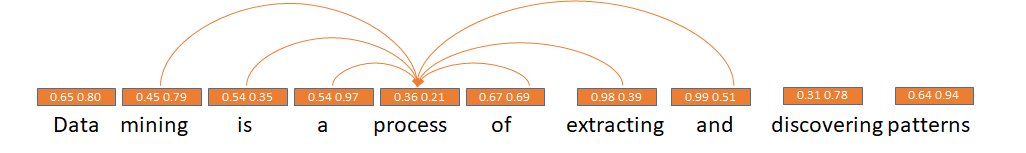

## Word2vec - Idea
2. **Skip-gram** (Continuous Skip-gram Model)
- predict the context / neighbouring words based on the current word
  - this is called **Skip-gram** (Continuous Skip-gram Model)
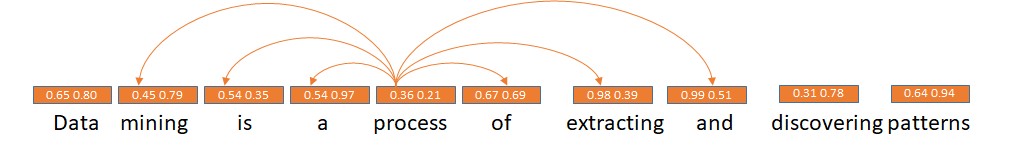

## Word2vec

- getting vectors which can be used in NLP tasks require a training on large data
  - thus so called "pretrained" models exists
  - one of them is [`google-news-300`](https://code.google.com/archive/p/word2vec/)
    - trained Google News (100 billion words)

In [38]:
# this will download the model (which is 1.3 GB huge) - to change the target folder, execute the following two lines
import os
os.environ["GENSIM_DATA_DIR"] = "C:\\Uni_Lecture_DM"

import gensim.downloader
word2vec_model = gensim.downloader.load('word2vec-google-news-300')


## Word2vec tasks
- getting the embedding of a word can be achived through the index operation `[]`

In [39]:
vec_king = word2vec_model['king'] # obtain vectors
print(vec_king[:5])


[ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477]


- you can also compare two words with each other

In [40]:
print(word2vec_model.similarity('data', 'mining'))
print(word2vec_model.similarity('mining', 'drilling'))
print(word2vec_model.similarity('mining', 'banana'))

0.12479271
0.49668232
0.09670783


## Word2vec tasks
- or given multiple words, select the one which does fit to the others


In [41]:
word2vec_model.doesnt_match(['introduction', 'main', 'conclusion', 'apple'])

'apple'

- given a word you can also query for most similar other words

In [42]:
word2vec_model.most_similar(positive='data', topn=5)

[('Data', 0.7262316942214966),
 ('datasets', 0.603030264377594),
 ('dataset', 0.5796631574630737),
 ('databases', 0.5450119972229004),
 ('statistics', 0.537885844707489)]

## Word2vec tasks
- another task is called **word analogies**
  - you define a kind of relation between two words and want to apply it to another word
  - A to B is like X to ?
  - a famous example: man to king is like woman to ?
<div>
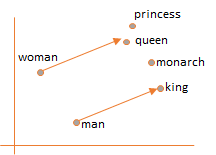
</div>

In [43]:
word2vec_model.most_similar(positive=['woman', 'king'], negative=['man'])
# apply man to king vector to woman

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

## Word2vec tasks
- to use it for predicion, you can for example use the vectors for each word and average them
  - this is implemented by ourselves in the following cell

In [44]:
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np

class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
    
    def transform(self, X):
        return_matrix = []
        for doc in X:
            mean_vector = np.zeros(self.model.vector_size)
            count = 0
            for word in self.tokenizer(doc):    
                try:
                    word_vector = self.model[word]
                except KeyError as e:
                    continue
                count += 1
                mean_vector = np.add(mean_vector, word_vector) #itterate over each word us average of emedding 

            return_matrix.append(mean_vector)
        return np.array(return_matrix)

    def fit(self, X, y=None, **fit_params):
        return self

In [45]:
# apply it in a very similar way as other vectorizers
word2vec_vectorizer = Word2VecVectorizer(model=word2vec_model, tokenizer=tokenize)
word2vec_matrix = word2vec_vectorizer.fit_transform(corpus_30_docs.data)
display(word2vec_matrix.shape)
word2vec_matrix

(30, 300)

array([[ -5.93856049,   2.99320316,   2.99622726, ...,  -6.91471863,
         -7.44404602,  12.28089142],
       [ -3.20137787,   1.36827946,   2.84358978, ...,  -5.09608459,
         -6.5078125 ,   4.64342117],
       [  5.60664368,   4.88203335,   9.46456528, ...,  -6.44226074,
          1.79742432,   5.36285782],
       ...,
       [ -4.4887085 ,   1.9991312 ,   8.24886703, ...,  -7.47753906,
         -4.79308701,   4.4306488 ],
       [  9.54878616,   4.33182812,  18.54619217, ..., -14.18075848,
         -0.89282227,  10.49032974],
       [  6.0100708 ,  -0.86128426,  10.8448143 , ..., -15.39837646,
         -5.78100586,   7.11032867]])

## Transformer based models
- differences to Word2Vec
  - takes the **sequence of words** into account
  - the embedding is dependent of the context words
    - e.g. A bat is a kind of bird. He is playing with a cricket bat.
    - the two instances of `bat` in the above example have different embeddings
- corresponding paper: [Attention Is All You Need](https://arxiv.org/abs/1706.03762)
- to use transformer based models in python easily, use the library called [`transformers`](https://huggingface.co/transformers/)

In [46]:
# when pytorch or tensoflow is allready installed
%pip install transformers

# for CPU-support only (installs also pytorch)
# %pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


- there are also already trained models available in the [model hub](https://huggingface.co/models)
  - they are automatically downloaded
  - in case you want to change the default location (`~/.cache/huggingface/`), execute the following cell

In [54]:
# import os
os.environ["TRANSFORMERS_CACHE"] = "C:\\Uni_Lecture_DM"

## Transformers - Tasks

- there are pretrained models for various tasks like
  - [**Sequence Classification**](https://huggingface.co/transformers/task_summary.html#sequence-classification)
  - [**Extractive Question Answering**](https://huggingface.co/transformers/task_summary.html#extractive-question-answering)
  - [Language Modeling](https://huggingface.co/transformers/task_summary.html#language-modeling)
  - [Text Generation](https://huggingface.co/transformers/task_summary.html#text-generation)
  - [Named Entity Recognition](https://huggingface.co/transformers/task_summary.html#named-entity-recognition)
  - [Summarization](https://huggingface.co/transformers/task_summary.html#summarization)
  - [Translation](https://huggingface.co/transformers/task_summary.html#translation)
  - Masked language modeling

To easily run these tasks with some sample data, you can use the `pipeline` function

## Transformers - Sequence Classification

In [48]:
# Sequence Classification
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

result = classifier("I hate you")[0]
display(f"label: {result['label']}, with score: {result['score']:.4f}")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

'label: NEGATIVE, with score: 0.9991'

In [49]:
result = classifier("I love you")[0]
display(f"label: {result['label']}, with score: {result['score']:.4f}")


'label: POSITIVE, with score: 0.9999'

## Transformers - Extractive Question Answering

In [50]:
text = r"""Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert)
provides general-purpose architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) 
for Natural Language Understanding (NLU) and Natural Language Generation (NLG) 
with over 32+ pretrained models in 100+ languages and deep interoperability between 
TensorFlow 2.0 and PyTorch.""".replace("\n", "") # based on https://huggingface.co/transformers/task_summary.html

question_answerer = pipeline("question-answering")
question_answerer(question="How many pretrained models are available in Transformers?", context=text)


No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

{'score': 0.5269609689712524, 'start': 252, 'end': 260, 'answer': 'over 32+'}

In [51]:
question_answerer(question="What does Transformers provide?", context=text)


{'score': 0.9512110948562622,
 'start': 90,
 'end': 119,
 'answer': 'general-purpose architectures'}

In [52]:
question_answerer(question="Transformers provides interoperability between which frameworks?", context=text)


{'score': 0.8400999307632446,
 'start': 331,
 'end': 357,
 'answer': 'TensorFlow 2.0 and PyTorch'}

## Masked language modeling
- it is possible to directly ask the model to fill in the slot

In [53]:
unmasker = pipeline("fill-mask")
unmasker(f"Data mining is a {unmasker.tokenizer.mask_token} of extracting and discovering patterns in large data sets.")

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

[{'sequence': 'Data mining is a method of extracting and discovering patterns in large data sets.',
  'score': 0.29560691118240356,
  'token': 5448,
  'token_str': ' method'},
 {'sequence': 'Data mining is a way of extracting and discovering patterns in large data sets.',
  'score': 0.21620669960975647,
  'token': 169,
  'token_str': ' way'},
 {'sequence': 'Data mining is a process of extracting and discovering patterns in large data sets.',
  'score': 0.14909793436527252,
  'token': 609,
  'token_str': ' process'},
 {'sequence': 'Data mining is a means of extracting and discovering patterns in large data sets.',
  'score': 0.13880659639835358,
  'token': 839,
  'token_str': ' means'},
 {'sequence': 'Data mining is a form of extracting and discovering patterns in large data sets.',
  'score': 0.036164723336696625,
  'token': 1026,
  'token_str': ' form'}]

## A closer look into the details for sequence classification
based on https://huggingface.co/transformers/task_summary.html#sequence-classification

In [55]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# this is a model fine tuned for detecting paraphrases
model_name = "bert-base-cased-finetuned-mrpc" 

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classes = ["not paraphrase", "is paraphrase"]

sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = "Apples are especially bad for your health"
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

# you do not need to tokenize the input yourself - the tokenizers comes with the model directly
paraphrase = tokenizer(sequence_0, sequence_2, return_tensors="pt")
not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors="pt")

paraphrase_classification_logits = model(**paraphrase).logits
not_paraphrase_classification_logits = model(**not_paraphrase).logits

paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0]
not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0]

print("This is a paraphrase:")
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(paraphrase_results[i] * 100))}%")

print("This is NOT a paraphrase:")
for i in range(len(classes)):
     print(f"{classes[i]}: {int(round(not_paraphrase_results[i] * 100))}%")

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

This is a paraphrase:
not paraphrase: 10%
is paraphrase: 90%
This is NOT a paraphrase:
not paraphrase: 94%
is paraphrase: 6%


In [33]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

class BertVectorizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, model, tokenizer, use_cls=False):
        self.model = model
        self.tokenizer = tokenizer
        self.use_cls = use_cls
    
    def bert_mean_pooling(self, model_output, attention_mask):
        token_embeddings = model_output[0] #First element of model_output contains all token embeddings
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    def transform(self, X):
        
        return_matrix = []
        
        for doc in X:
            tokenized = self.tokenizer(doc, padding=True, truncation=True, max_length=512, return_tensors='pt')
            
            self.model.eval()
            with torch.no_grad():
                output = self.model(tokenized['input_ids'])
            if self.use_cls:
                return_matrix.append(output[1].squeeze(0).numpy())
            else:
                mean_pooled = self.bert_mean_pooling(output, tokenized['attention_mask'])
                return_matrix.append(mean_pooled.squeeze(0).numpy())
            
        return np.array(return_matrix)

    def fit(self, X, y=None, **fit_params):
        return self

bert_model = AutoModel.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
bert_tokenizer = AutoTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')

bert_vectorizer = BertVectorizer(model=bert_model, tokenizer=bert_tokenizer, use_cls=False)

bert_matrix = bert_vectorizer.fit_transform(corpus_30_docs.data)
display(bert_matrix.shape)
bert_matrix

Some weights of the model checkpoint at huawei-noah/TinyBERT_General_4L_312D were not used when initializing BertModel: ['fit_denses.3.weight', 'fit_denses.2.weight', 'cls.seq_relationship.weight', 'fit_denses.4.weight', 'fit_denses.1.bias', 'cls.predictions.bias', 'fit_denses.1.weight', 'cls.predictions.transform.LayerNorm.weight', 'fit_denses.4.bias', 'fit_denses.2.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'fit_denses.0.bias', 'fit_denses.0.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'fit_denses.3.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing

(30, 312)

array([[-0.22132593,  0.48229796,  0.34609634, ..., -0.21943335,
        -0.40168598,  0.02375952],
       [-0.00865531,  0.4925196 ,  0.21192214, ..., -0.17613658,
        -0.36130357, -0.13788907],
       [-0.28283894,  0.4302612 ,  0.13786253, ...,  0.06639766,
        -0.3324021 , -0.07025055],
       ...,
       [-0.1931627 ,  0.40725052,  0.2777511 , ..., -0.06686439,
        -0.27932414, -0.04545123],
       [-0.22708623,  0.371966  ,  0.03357483, ...,  0.00458925,
        -0.33285904, -0.19900586],
       [-0.35937116,  0.42073113,  0.01456856, ...,  0.05189459,
        -0.3703887 , -0.06655513]], dtype=float32)

### Try it out yourself
- Task 7.1.1
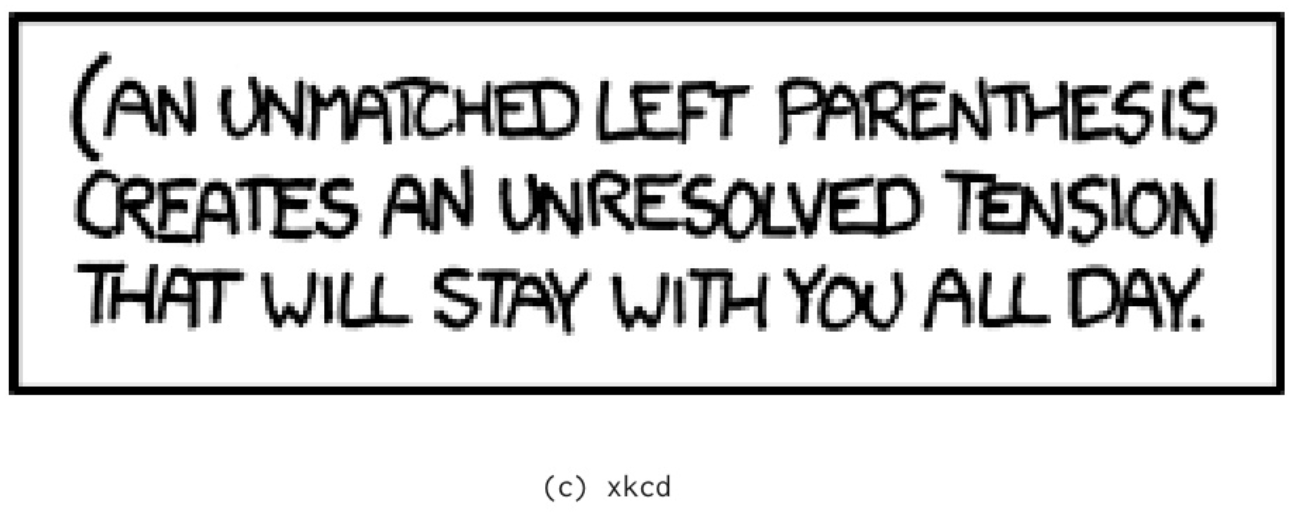